# 项目：分析鸢尾花种类数据

## 分析目标

此数据分析报告的目的是基于鸢尾花的属性数据，分析两种鸢尾花萼片、花瓣的长度和宽度平均值，是否存在显著性差异，让我们可以对不同种类鸢尾花的属性特征进行推断。

## 简介

**原始数据`Iris.csv`包含四个属性（特征值）**

- SepalLengthCm：萼片的长度（单位为厘米）。
- SepalWidthCm：萼片的宽度（单位为厘米）。
- PetalLengthCm：花瓣的长度（单位为厘米）。
- PetalWidthCm：花瓣的宽度（单位为厘米）。

**`Species`包含两个种类（目标值）**

- Iris-setosa：山鸢尾
- Iris-versicolor：杂色鸢尾

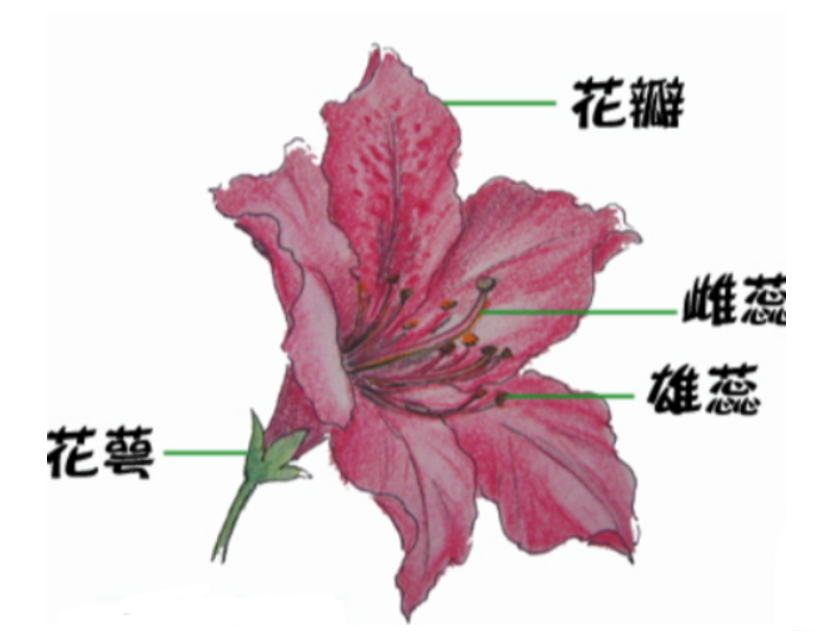

## 读取数据

In [1]:
import pandas as pd

C:\Users\SAMSUNG\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
original_data = pd.read_csv("Iris.csv")

## 清理数据

In [3]:
cleaned_data = original_data.copy()

In [4]:
cleaned_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


据观察，此数据集不存在结构性问题，接下来进一步评估数据干净度。

In [5]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             100 non-null    int64  
 1   SepalLengthCm  100 non-null    float64
 2   SepalWidthCm   100 non-null    float64
 3   PetalLengthCm  100 non-null    float64
 4   PetalWidthCm   100 non-null    float64
 5   Species        100 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 4.8+ KB


从输出结果来看，`cleaned_data`数据共有100条观察值，不存在缺失值。

`Id`表示样本ID，数据类型应为字符串，需要进行数据格式转换。

In [6]:
cleaned_data["Id"] = cleaned_data["Id"].astype("str")
cleaned_data["Id"]

0       1
1       2
2       3
3       4
4       5
     ... 
95     96
96     97
97     98
98     99
99    100
Name: Id, Length: 100, dtype: object

In [7]:
cleaned_data["Id"].duplicated().sum()

0

In [8]:
cleaned_data["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Name: count, dtype: int64

In [9]:
cleaned_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.094000,2.862000,0.785000
std,0.641698,0.476057,1.448565,0.566288
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.400000,3.050000,2.450000,0.800000
75%,5.900000,3.400000,4.325000,1.300000
max,7.000000,4.400000,5.100000,1.800000


`cleaned_data`不存在重复值，无需去重。从以上输出结果来看，`Species`只有两种可能的值，`Iris-versicolor`和`Iris-setosa`，不存在不一致数据。

此外，由于数据不存在脱离现实意义的数据，无需进一步删改。

## 整理数据

对数据的整理，与分析方向紧密相关。此次数据分析目标是，基于鸢尾花的属性数据，分析两种鸢尾花萼片、花瓣的长度和宽度平均值，是否存在显著性差异。

那么我们可以对数据基于`Species`列，先把各个鸢尾花种类样本数据筛选出来。

In [10]:
iris_setosa = cleaned_data.query('Species == "Iris-setosa"')
iris_setosa.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
iris_versicolor = cleaned_data.query('Species == "Iris-versicolor"')
iris_versicolor.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor


In [12]:
# 把数据针对Species进行分组，计算花萼片长度的平均值
cleaned_data.groupby("Species")["SepalLengthCm"].mean()

Species
Iris-setosa        5.006
Iris-versicolor    5.936
Name: SepalLengthCm, dtype: float64

In [13]:
# 把数据针对Species进行分组，计算花萼片宽度的平均值
cleaned_data.groupby("Species")["SepalWidthCm"].mean()

Species
Iris-setosa        3.418
Iris-versicolor    2.770
Name: SepalWidthCm, dtype: float64

In [14]:
# 把数据针对Species进行分组，计算花瓣长度的平均值
cleaned_data.groupby("Species")["PetalLengthCm"].mean()

Species
Iris-setosa        1.464
Iris-versicolor    4.260
Name: PetalLengthCm, dtype: float64

In [15]:
# 把数据针对Species进行分组，计算花瓣宽度的平均值
cleaned_data.groupby("Species")["PetalWidthCm"].mean()

Species
Iris-setosa        0.244
Iris-versicolor    1.326
Name: PetalWidthCm, dtype: float64

根据以上数值，我们推测假设检验的结果是，两种鸢尾花的花瓣长度具有统计显著性差异。除花瓣长度以外的其余数值我们尚无法推测出结论，需要通过数据可视化做进一步推断。

## 数据可视化

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

### 鸢尾花种类比例

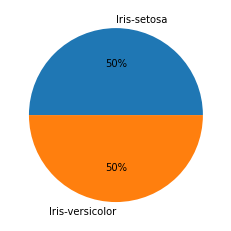

In [17]:
species_count=cleaned_data["Species"].value_counts()
plt.pie(species_count, autopct='%.0f%%', labels=species_count.index)
plt.show()

从上图可以看出，`Setosa`和`Versicolor`种类的占比一致，分别为1/2（即每种有50个样本）。

### 鸢尾花各特征直方图

array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>],
       [<Axes: title={'center': 'PetalLengthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>]], dtype=object)

<Figure size 3600x2160 with 0 Axes>

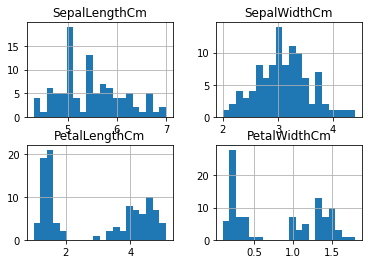

In [18]:
plt.figure(figsize=(50,30))
cleaned_data.hist(bins=20)

Setosa 和 Versicolor 萼片以及花瓣的长度、宽度的分布如下：

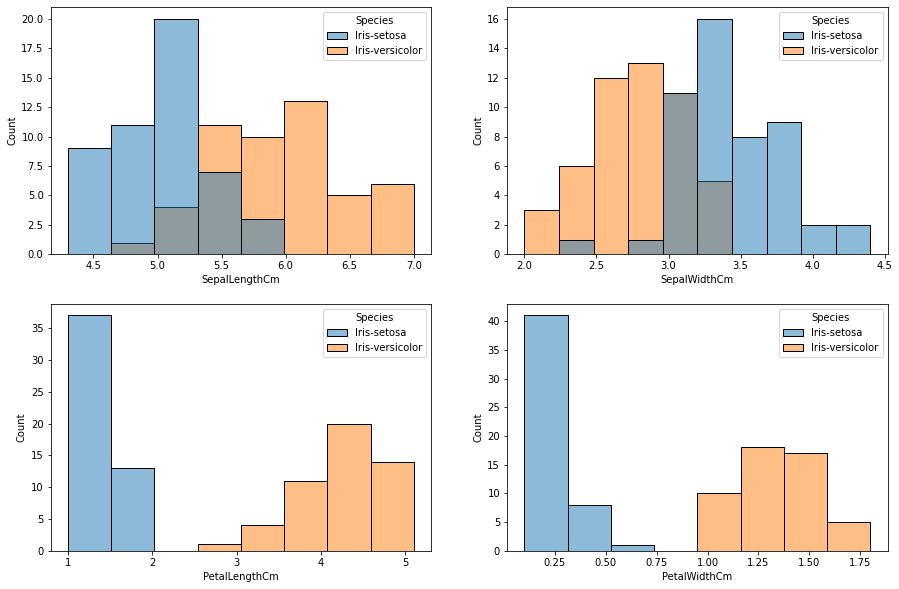

In [19]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

sns.histplot(data=cleaned_data,x='SepalLengthCm',hue='Species',ax=axes[0,0])
sns.histplot(data=cleaned_data,x='SepalWidthCm',hue='Species',ax=axes[0,1])
sns.histplot(data=cleaned_data,x='PetalLengthCm',hue='Species',ax=axes[1,0])
sns.histplot(data=cleaned_data,x='PetalWidthCm',hue='Species',ax=axes[1,1])

plt.show()

结合以上两张图可以推断，总体接近正态分布（满足t检验的其中一个假设）。同时根据直方图可以推断不同种类的鸢尾花花瓣长度与宽度具有显著性差异，我们用成对图进一步论证此观点。

### 鸢尾花成对特征散点图

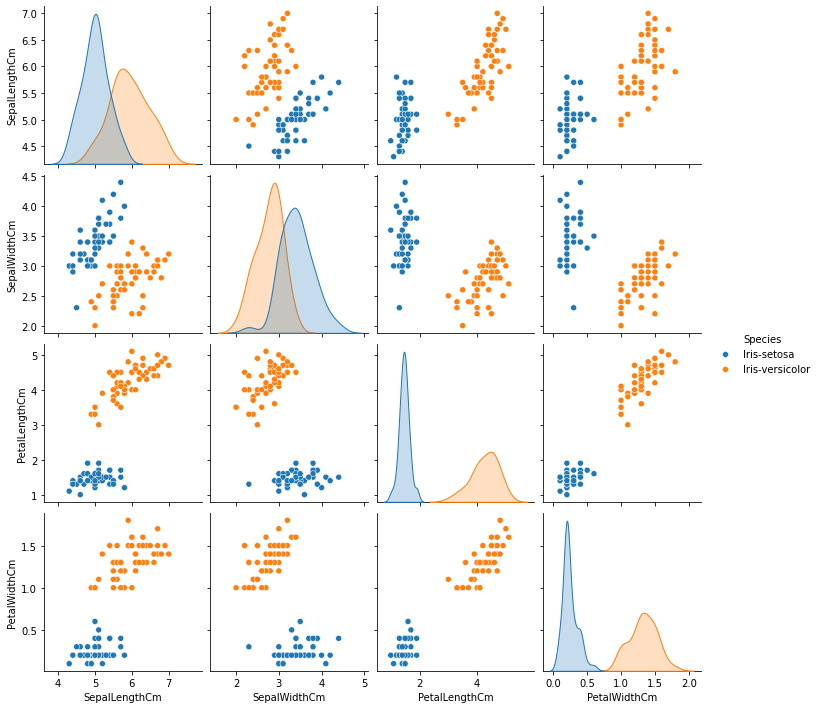

In [20]:
sns.pairplot(cleaned_data, hue="Species")
plt.show()

从以上可以看出，`Setosa`和`Versicolor`样本的花瓣长度以及花瓣宽度的分布存在明显数值上的不同，已经可以猜测假设检验的结果是，两种鸢尾花的花瓣长度与宽度有统计显著性差异。

萼片的长度和宽度在分布上存在重叠，暂时无法仅通过图表下结论，需要进行假设检验，来推断总体的萼片长度和宽度之间是否有差异。

同时，花瓣的长度和宽度之间以及萼片的长度和花瓣的长、宽之间具有比较明显的线性关系。

### 假设检验

我们将利用假设检验，依次检验`Setosa`和`Versicolor`这两种鸢尾花在萼片、花瓣的长度和宽度平均值方面，是否存在统计显著性差异。

由于总体方差未知，且两组样本数50并没有显著大于30，所以我们采用t检验。根据上述直方图绘制，总体满足正态分布且两组数据为随机抽样，因此我们假设t检验前提被满足。

In [21]:
from scipy.stats import ttest_ind

### 假设检验1：分析鸢尾花萼片长度

#### Step1：建立假设

$H_0$：Setosa鸢尾花和Versicolor鸢尾花萼片长度的平均值不存在显著区别。

$H_1$：Setosa鸢尾花和Versicolor鸢尾花萼片长度的平均值存在显著区别。

#### Step2：确认检验是单尾还是双尾

由于我们只看平均值是否存在差异，不做数值大小判断，所以是双尾检验。

#### Step3：确定显著水平

一般来说选择0.05。

#### Step4：计算t值与p值

In [22]:
t_stat, p_value = ttest_ind(iris_setosa["SepalLengthCm"], iris_versicolor["SepalLengthCm"])
print(t_stat, p_value)

-10.52098626754911 8.985235037487077e-18


#### Step5: 结论

由于p值小于显著水平0.05，我们拒绝原假设，因此我们得出结论Setosa鸢尾花与Versicolor鸢尾花萼片长度的平均值存在显著差异。

### 假设检验2：分析鸢尾花萼片宽度

#### Step1：建立假设

$H_0$：Setosa鸢尾花和Versicolor鸢尾花萼片宽度的平均值不存在显著区别。

$H_1$：Setosa鸢尾花和Versicolor鸢尾花萼片宽度的平均值存在显著区别。

#### Step2：确认检验是单尾还是双尾

由于我们只看平均值是否存在差异，不做数值大小判断，所以是双尾检验。

#### Step3：确定显著水平

一般来说选择0.05。

#### Step4：计算t值与p值

In [23]:
t_stat, p_value = ttest_ind(iris_setosa["SepalWidthCm"], iris_versicolor["SepalWidthCm"])
print(t_stat, p_value)

9.282772555558111 4.362239016010214e-15


#### Step5: 结论

由于p值小于显著水平0.05，我们拒绝原假设，因此我们得出结论Setosa鸢尾花与Versicolor鸢尾花萼片宽度的平均值存在显著差异。

### 假设检验3：分析鸢尾花花瓣长度

#### Step1：建立假设

$H_0$：Setosa鸢尾花和Versicolor鸢尾花花瓣长度的平均值不存在显著区别。

$H_1$：Setosa鸢尾花和Versicolor鸢尾花花瓣长度的平均值存在显著区别。

#### Step2：确认检验是单尾还是双尾

由于我们只看平均值是否存在差异，不做数值大小判断，所以是双尾检验。

#### Step3：确定显著水平

一般来说选择0.05。

#### Step4：计算t值与p值

In [24]:
t_stat, p_value = ttest_ind(iris_setosa["PetalLengthCm"], iris_versicolor["PetalLengthCm"])
print(t_stat, p_value)

-39.46866259397272 5.717463758170621e-62


#### Step5: 结论

由于p值小于显著水平0.05，我们拒绝原假设，因此我们得出结论Setosa鸢尾花与Versicolor鸢尾花瓣长度的平均值存在显著差异。

### 假设检验4：分析鸢尾花花瓣宽度

#### Step1：建立假设

$H_0$：Setosa鸢尾花和Versicolor鸢尾花花瓣宽度的平均值不存在显著区别。

$H_1$：Setosa鸢尾花和Versicolor鸢尾花花瓣宽度的平均值存在显著区别。

#### Step2：确认检验是单尾还是双尾

由于我们只看平均值是否存在差异，不做数值大小判断，所以是双尾检验。

#### Step3：确定显著水平

一般来说选择0.05。

#### Step4：计算t值与p值

In [25]:
t_stat, p_value = ttest_ind(iris_setosa["PetalWidthCm"], iris_versicolor["PetalWidthCm"])
print(t_stat, p_value)

-34.01237858829048 4.589080615710866e-56


#### Step5: 结论

由于p值小于显著水平0.05，我们拒绝原假设，因此我们得出结论Setosa鸢尾花与Versicolor鸢尾花瓣宽度的平均值存在显著差异。

## 结论

通过假设检验的结果，我们发现Setosa鸢尾花和Versicolor鸢尾花萼片、花瓣的长度和宽度平均值，均具有统计显著性的差异。